# 读取文件

(1688, 4)
4995
0


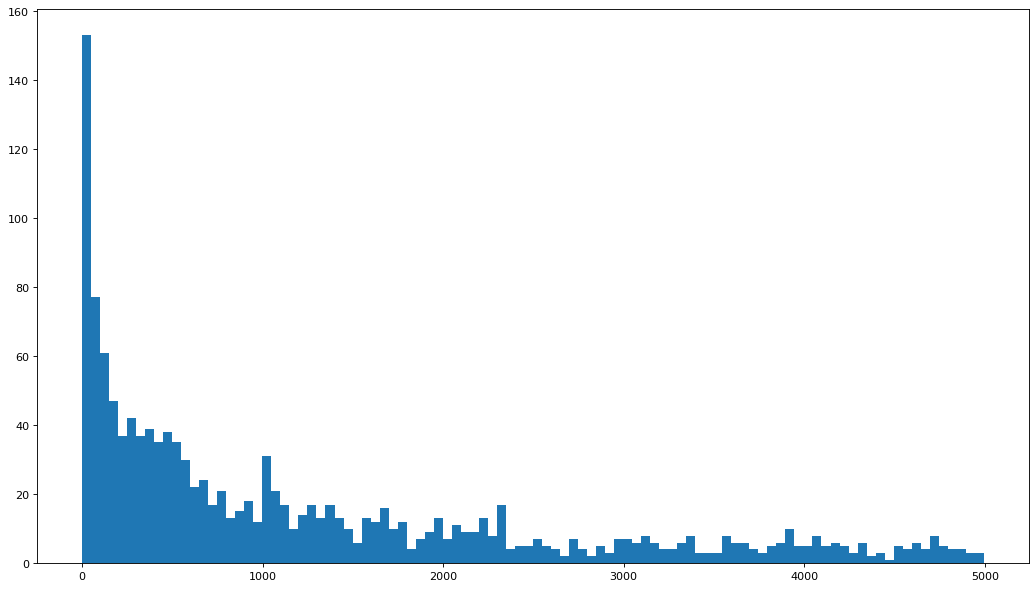

In [4]:
import numpy as np
from matplotlib import pyplot as plt

us_file_path = './youtube_video_data/US_video_data_numbers.csv'
uk_file_path = './youtube_video_data/GB_video_data_numbers.csv'

t_us = np.loadtxt(us_file_path, delimiter=',', dtype=np.int64)
t_uk = np.loadtxt(uk_file_path, delimiter=',', dtype=np.int64)

print(t_us.shape)

# 取评论数据
t_us_comments=t_us[:,-1]
t_us_comments = t_us_comments[t_us_comments < 5000]
# 设置图的尺寸和dpi，更加清晰
plt.figure(figsize=(16, 9), dpi=80)

#看最大值和最小值
print(t_us_comments.max())
print(t_us_comments.min())
# 绘图
plt.hist(t_us_comments, bins=100)
plt.show()

## 数组中的inf和nan

In [5]:
# NumPy 中的 1/0 示例
import numpy as np

# 1 除以 0 会返回 inf
result = np.array([1.0]) / np.array([0.0])
print(result)  # [inf]


[inf]


C:\Users\41507\AppData\Local\Temp\ipykernel_26480\610966506.py:5: RuntimeWarning: divide by zero encountered in divide
  result = np.array([1.0]) / np.array([0.0])


In [7]:
np.inf >-np.inf

True

In [9]:
np.nan==np.nan

False

In [11]:
t = np.arange(24,dtype=float).reshape(4,6)

# 将三行四列的数改成nan
t[3,4] = np.nan
print(t)

# 可以使用np.count_nonzero() 来判断非零的个数
print(np.count_nonzero(t))


print(t != t)
# 并 且  np.nan != np.nan    结果 是TRUE
# 所以我们可以使用这两个结合使用判断nan的个数
print(np.count_nonzero(t != t))

# 将nan替换为0
t[np.isnan(t)] = 10
print(t)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. nan 23.]]
23
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False  True False]]
1
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 10. 23.]]


In [21]:
import numpy as np

# 假设原始数据为 3 行 4 列的二维数组
a = np.arange(12).reshape(3, 4)

# 将其 reshape 为 (1, 12) 的二维数组
b = a.reshape(1, -1)
b


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [22]:
#特征列存在nan，需要用对应列的均值替换nan
t = np.arange(24,dtype=float).reshape(4,6)
t[2,2:5]=np.nan
print(t)
# 计算每一列的均值，忽略nan
col_mean = np.nanmean(t, axis=0)
print(col_mean)
# 找到每一列中的nan位置
mask = np.isnan(t)
print(mask)
print('-'*50)
print(col_mean.reshape(1, -1)) #变为(1,6)
print(col_mean[np.newaxis, :]) #变为(1,6)
print('-'*50)
# 用对应列的均值替换nan,repeat函数用于复制均值数组，使其形状与t相同
print(np.repeat(col_mean.reshape(1, -1), t.shape[0], axis=0))
t[mask] = np.repeat(col_mean.reshape(1, -1), t.shape[0], axis=0)[mask]
t

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. nan nan nan 17.]
 [18. 19. 20. 21. 22. 23.]]
[ 9. 10. 10. 11. 12. 14.]
[[False False False False False False]
 [False False False False False False]
 [False False  True  True  True False]
 [False False False False False False]]
--------------------------------------------------
[[ 9. 10. 10. 11. 12. 14.]]
[[ 9. 10. 10. 11. 12. 14.]]
--------------------------------------------------
[[ 9. 10. 10. 11. 12. 14.]
 [ 9. 10. 10. 11. 12. 14.]
 [ 9. 10. 10. 11. 12. 14.]
 [ 9. 10. 10. 11. 12. 14.]]


array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 10., 11., 12., 17.],
       [18., 19., 20., 21., 22., 23.]])